Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Load Dataset

In [2]:
df = pd.read_csv("/content/Air_Quality.csv")

Data Preprocessing

In [19]:
# Hapus kolom yang tidak relevan (misalnya 'Date' atau 'Unnamed')
if 'Date' in df.columns:
  df = df.drop(columns=['Date'])

In [20]:
# Tangani missing values
df = df.dropna()

In [21]:
# Normalisasi data numerik
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [22]:
# Membuat kolom Target berdasarkan PM2.5
def categorize_pm25(value):
  if value <= 12:
    return "Baik"
  elif value <= 35:
    return "Sedang"
  else: return "Buruk"
df['Target'] = df['PM2.5'].apply(categorize_pm25)

In [23]:
# Encoding target
label_enc = LabelEncoder()
df['Target'] = label_enc.fit_transform(df['Target'])

Exploratory Data (EDA)

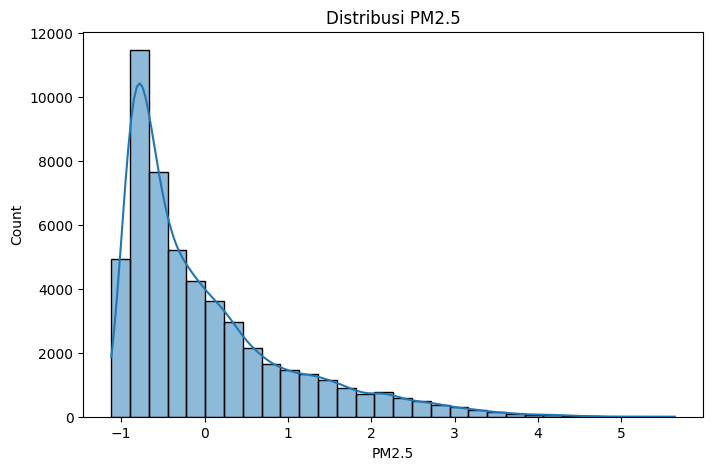

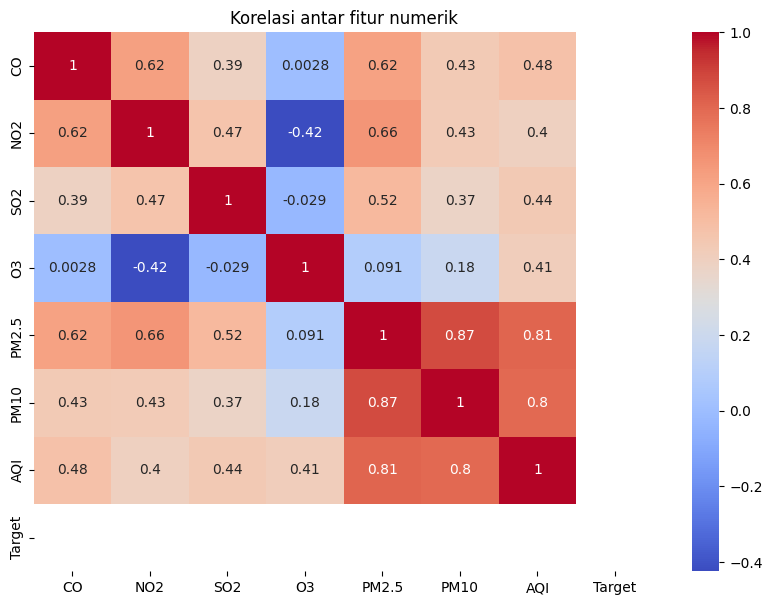

Ringkasan Statistik:
                 CO           NO2           SO2            O3         PM2.5  \
count  5.256000e+04  5.256000e+04  5.256000e+04  5.256000e+04  5.256000e+04   
mean   8.651966e-18  3.460787e-17 -8.651966e-17  1.297795e-17  8.651966e-18   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -1.315429e+00 -1.248721e+00 -6.124427e-01 -1.837640e+00 -1.117799e+00   
25%   -6.143923e-01 -7.622705e-01 -5.479120e-01 -6.680093e-01 -7.418850e-01   
50%   -2.672769e-01 -2.706454e-01 -4.148173e-01 -1.259854e-01 -3.465268e-01   
75%    2.908302e-01  4.952546e-01  1.982250e-01  5.586764e-01  4.053018e-01   
max    9.363475e+00  5.328705e+00  1.865402e+01  6.378302e+00  5.642177e+00   

               PM10           AQI   Target  
count  52560.000000  5.256000e+04  52560.0  
mean       0.000000 -2.162992e-17      0.0  
std        1.000010  1.000010e+00      0.0  
min       -0.774291 -1.479158e+00      0.0  
25%       -0.568198 -7.755646e-01      0.0

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['PM2.5'], bins=30, kde=True)
plt.title("Distribusi PM2.5")
plt.show()

numeric_df = df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar fitur numerik")
plt.show()

print("Ringkasan Statistik:")
print(df.describe())

Seleksi Fitur

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Gunakan hanya kolom numerik
X = df.select_dtypes(include=['float64','int64']).drop(columns=['Target'])
y = df['Target']

# Skala ke rentang [0,1] agar semua non-negatif
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Seleksi fitur dengan chi2
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]

print("Fitur terpilih:", selected_features)

Fitur terpilih: Index(['SO2', 'O3', 'PM2.5', 'PM10', 'AQI'], dtype='object')


Modeling dengan Decision Tree

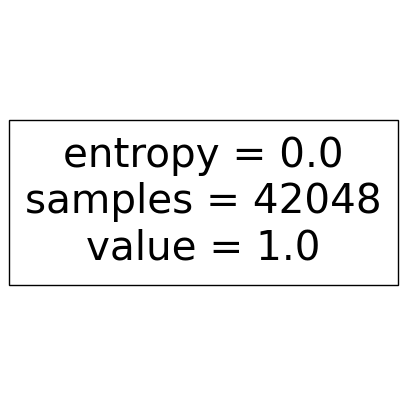

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Visualisasi pohon keputusan
plt.figure(figsize=(5,5))
plot_tree(model, feature_names=selected_features, class_names=label_enc.classes_, filled=True)
plt.show()

Evaluasi Model

In [18]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_enc.classes_))

print("Akurasi:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[10512]]

Classification Report:
              precision    recall  f1-score   support

        Baik       1.00      1.00      1.00     10512

    accuracy                           1.00     10512
   macro avg       1.00      1.00      1.00     10512
weighted avg       1.00      1.00      1.00     10512

Akurasi: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
